In [90]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
from matplotlib import style
import numpy as np
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline

Notes: grab stock data, sp500 data, plot correlation heatmap, linear regression

In [91]:
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2018,10,26)
nvda = web.DataReader('NVDA', 'yahoo', start, end)
nvda.to_csv('nvda.csv')

In [92]:
df = pd.read_csv('nvda.csv', parse_dates=True, index_col=0)
df.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2016-01-04  32.580002  32.040001  32.290001  32.369999   8951900.0  31.880356
2016-01-05  33.439999  32.500000  32.980000  32.889999  12256800.0  32.392487
2016-01-06  32.500000  31.160000  32.349998  31.530001  11233600.0  31.053066
2016-01-07  30.950001  29.879999  30.740000  30.280001  16132600.0  29.821972
2016-01-08  30.700001  29.570000  30.670000  29.629999   9961800.0  29.181805

Line Graph with 25 day moving average.

<function matplotlib.pyplot.show(*args, **kw)>

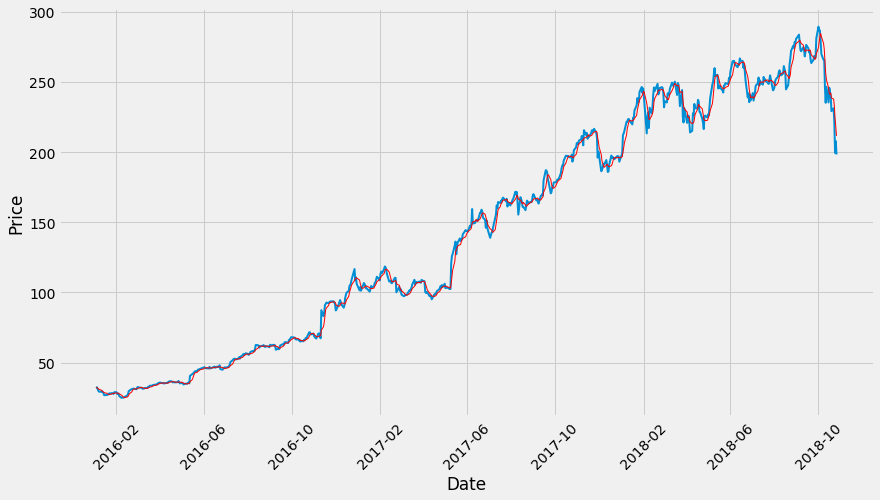

In [93]:
style.use('fivethirtyeight')

MA_25 = df['Adj Close'].rolling(window=5, min_periods=0).mean()

plt.figure(figsize=(13,7))
plt.plot(df.index, df['Adj Close'], linewidth=2)
plt.plot(df.index, MA_25, linewidth=1, c='r')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')

plt.show

Charting candlestick graph

In [94]:
ohlc = df['Adj Close'].resample('5D').ohlc()
ohlc_volume = df['Volume'].resample('5D').sum()

ohlc.reset_index(inplace=True)
ohlc['Date'] = ohlc['Date'].map(mdates.date2num)

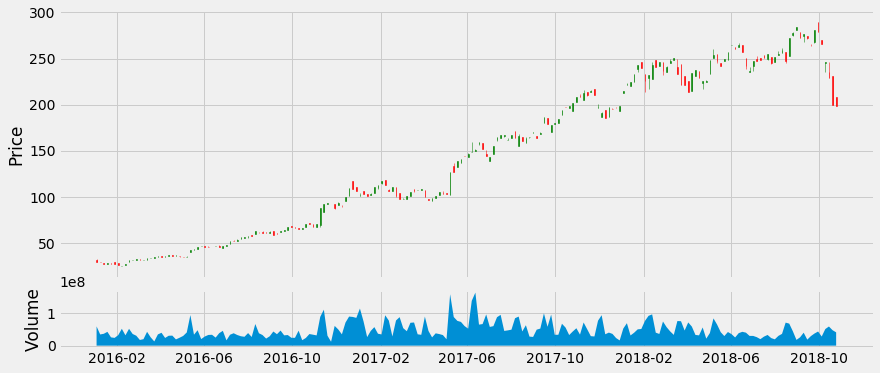

In [95]:
plt.figure(figsize=(13,7))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=4, colspan=1)
plt.ylabel('Price')
ax2 = plt.subplot2grid((6,1), (4,0), rowspan=1, colspan=1, sharex=ax1)
plt.ylabel('Volume')

candlestick_ohlc(ax1, ohlc.values, width=1, colorup='g', colordown='r')
ax2.fill_between(ohlc_volume.index.map(mdates.date2num), ohlc_volume.values)
ax2.xaxis_date()
plt.setp(ax1.get_xticklabels(), visible=False)

plt.show()

<h2>Grabbing S&P500 Tickers</h2>
<b>Sectors to grab</b>
-materials, industrials, health care, information technology, communication services

In [96]:
#getting tickers
from bs4 import BeautifulSoup
import requests

chart = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
req = requests.get(chart).text
soup = BeautifulSoup(req, 'lxml')

In [97]:
table = soup.find('table', {'class': 'wikitable sortable'})

sectors = ['Materials', 'Industrials', 'Health Care', 'Information Technology', 'Communication Services']
tickers = []

for tr in table.find_all('tr')[1:]:
    if tr.find_all('td')[3].text in sectors:
        tickers.append(tr.find('td').text)
        
len(tickers)

249

In [98]:
main_df = pd.DataFrame()
count = 0

for ticker in tickers:
    ticker_df = web.DataReader(ticker, 'yahoo', start, end)
    ticker_df.drop(['High', 'Low', 'Open', 'Close', 'Volume'], 1, inplace=True)
    ticker_df.rename(columns={'Adj Close': ticker}, inplace=True)
    
    if main_df.empty:
        main_df = ticker_df
    else:
        main_df = main_df.join(ticker_df, how='outer')
    count += 1
    if count % 50 == 0:
        print(count)

main_df.head()

50
100
150
200


MMM        ABT       ABBV       ABMD        ACN       ATVI  \
Date                                                                            
2016-01-04  137.027283  40.189907  51.504684  85.239998  96.105782  36.899021   
2016-01-05  137.624573  40.180538  51.290115  85.000000  96.605988  36.428223   
2016-01-06  134.852661  39.843513  51.299061  85.300003  96.417236  36.084930   
2016-01-07  131.567429  38.888622  51.147072  81.919998  93.585876  35.574898   
2016-01-08  131.119476  38.074150  49.752403  84.580002  92.679840  35.025627   

                 ADBE   AMD         AET          A    ...             WAT  \
Date                                                  ...                   
2016-01-04  91.970001  2.77  105.802124  39.620991    ...      130.350006   
2016-01-05  92.339996  2.75  107.274010  39.484665    ...      129.809998   
2016-01-06  91.019997  2.51  106.731750  39.659939    ...      129.710007   
2016-01-07  89.110001  2.28  106.780128  37.975388    ...      128.820007   
2016-01-08  87.849998  2.14  103.681419  37.576157    ...      126.720001   

                  WCG        WDC         WU        WRK        XRX       XLNX  \
Date                                                                           
2016-01-04  76.449997  55.674755  15.999216  37.448967  25.546917  42.965004   
2016-01-05  78.120003  55.435089  15.935653  37.424290  25.497311  43.602917   
2016-01-06  76.699997  54.199921  15.572449  36.387699  25.174871  42.805527   
2016-01-07  73.779999  53.305809  15.481647  36.025719  24.480396  41.116951   
2016-01-08  72.599998  51.056698  15.354527  34.495506  23.785915  40.272655   

                  XYL         ZBH        ZTS  
Date                                          
2016-01-04  34.709618   99.518364  46.328617  
2016-01-05  34.699997  101.590668  47.053879  
2016-01-06  34.267082  102.030518  47.063679  
2016-01-07  33.382030   99.684547  45.632755  
2016-01-08  33.064571   99.264236  44.966297  

[5 rows x 249 columns]

In [99]:
main_df['NVDA'].head()
main_df.shape

(711, 249)

<h2>Change stock price to predict</h2>

In [ ]:
from collections import Counter

stock = 'MSFT'
days = 5

for i in range(1, days+1):
    main_df['{}_{}d'.format(stock, i)] = main_df[stock].shift(-i) / main_df[stock] - 1

main_df.fillna(0, inplace=True)
main_df.iloc[:,-5:].head()

<h2>Change the requirement to buy, sell, or hold</h2>

In [111]:
#predicting buy/sell/hold over 5 days
def predict_action(*args):
    changes = [col for col in args]
    requirement = 0.02

    positive_sum = sum([i for i in changes if i > 0])
    negative_sum = sum([i for i in changes if i < 0])
    max_change = max([positive_sum, negative_sum], key=abs)
    biggest_change = max(changes) if max_change > 0 else min(changes)

    if biggest_change > requirement:
        return 1
    if biggest_change < -requirement:
        return -1
    return 0

In [112]:
# tickers, main_df, stock

main_df['{}_target'.format(stock)] = list(map(predict_action,*[main_df['{}_{}d'.format(stock, i)] for i in range(1, days+1)]))
main_df[[stock, *['{}_{}d'.format(stock, i) for i in range(1, days+1)], '{}_target'.format(stock)]].head()

MSFT   MSFT_1d   MSFT_2d   MSFT_3d   MSFT_4d   MSFT_5d  \
Date                                                                      
2016-01-04  51.505280  0.004562 -0.013686 -0.047993 -0.045073 -0.045621   
2016-01-05  51.740250 -0.018165 -0.052316 -0.049410 -0.049955 -0.041235   
2016-01-06  50.800369 -0.034783 -0.031822 -0.032377 -0.023497 -0.044588   
2016-01-07  49.033405  0.003067  0.002492  0.011692 -0.010159  0.018018   
2016-01-08  49.183784 -0.000573  0.008599 -0.013186  0.014905 -0.025607   

            MSFT_target  
Date                     
2016-01-04           -1  
2016-01-05           -1  
2016-01-06           -1  
2016-01-07            0  
2016-01-08           -1

In [113]:
count_actions = Counter(main_df['{}_target'.format(stock)].tolist())

count_actions

Counter({-1: 131, 0: 333, 1: 247})

In [114]:
#normalize features data

main_df.fillna(0, inplace=True)
main_df = main_df.replace([np.inf, -np.inf], np.nan)
main_df.dropna(inplace=True)

features_df = main_df[[ticker for ticker in tickers]].pct_change()
features_df = features_df.replace([np.inf, -np.inf], 0)
features_df.fillna(0, inplace=True)
features_df.head()

MMM       ABT      ABBV      ABMD       ACN      ATVI  \
Date                                                                     
2016-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2016-01-05  0.004359 -0.000233 -0.004166 -0.002816  0.005205 -0.012759   
2016-01-06 -0.020141 -0.008388  0.000174  0.003529 -0.001954 -0.009424   
2016-01-07 -0.024362 -0.023966 -0.002963 -0.039625 -0.029366 -0.014134   
2016-01-08 -0.003405 -0.020944 -0.027268  0.032471 -0.009681 -0.015440   

                ADBE       AMD       AET         A    ...          WAT  \
Date                                                  ...                
2016-01-04  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
2016-01-05  0.004023 -0.007220  0.013912 -0.003441    ...    -0.004143   
2016-01-06 -0.014295 -0.087273 -0.005055  0.004439    ...    -0.000770   
2016-01-07 -0.020984 -0.091633  0.000453 -0.042475    ...    -0.006861   
2016-01-08 -0.014140 -0.061403 -0.029020 -0.010513    ...    -0.016302   

                 WCG       WDC        WU       WRK       XRX      XLNX  \
Date                                                                     
2016-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2016-01-05  0.021844 -0.004305 -0.003973 -0.000659 -0.001942  0.014847   
2016-01-06 -0.018177 -0.022281 -0.022792 -0.027698 -0.012646 -0.018288   
2016-01-07 -0.038070 -0.016497 -0.005831 -0.009948 -0.027586 -0.039448   
2016-01-08 -0.015993 -0.042193 -0.008211 -0.042476 -0.028369 -0.020534   

                 XYL       ZBH       ZTS  
Date                                      
2016-01-04  0.000000  0.000000  0.000000  
2016-01-05 -0.000277  0.020823  0.015655  
2016-01-06 -0.012476  0.004330  0.000208  
2016-01-07 -0.025828 -0.022993 -0.030404  
2016-01-08 -0.009510 -0.004216 -0.014605  

[5 rows x 249 columns]

In [115]:
features_df.shape
#main_df['{}_target'.format(stock)].shape

(711, 249)

In [116]:
# create X, y

X = features_df.values
y = main_df['{}_target'.format(stock)].values
#X, y

In [117]:
#split testing
from sklearn import model_selection, neighbors

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25)

In [118]:
#training the model
model = neighbors.KNeighborsClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy * 100

43.82022471910113

In [119]:
predictions = model.predict(X_test)
Counter(predictions)

Counter({0: 115, -1: 40, 1: 23})